# Lab 2: Optimization

### 1. Gradient Descent

In this exercise, we use gradient descent to find the minimum of: $f(\theta)=(\theta-2)^2+5$

**1. What’s the gradient of our function f? Define a gradient function g and plot it.**

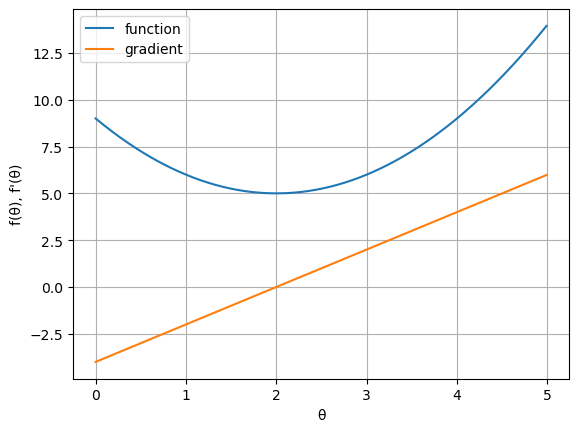

In [1]:
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=RuntimeWarning)
import numpy as np
import matplotlib.pyplot as plt

def function(theta):
    f = (theta - 2)**2 + 5
    return f

def gradient(theta):
    f = 2 * theta - 4
    return f

xs = np.arange(0, 5, 0.01)
ys_function = function(xs)
ys_gradient = gradient(xs)

plt.plot(xs, ys_function, label='function')
plt.plot(xs, ys_gradient, label="gradient")

plt.xlabel('θ')
plt.ylabel('f(θ), f\'(θ)')
plt.legend()
plt.grid(True)
plt.show()

**2. Assume a constant learning rate of λ = .8. Write down the general update step for gradient descent.**

General:
$\theta_{t+1} = \theta_t - \lambda f'(\theta_t)$

Example:
$\theta_{t+1} = \theta_t - 0.8 \cdot (2\theta - 4)$

**3. Implement gradient descent for minimizing $f$ making use of your defined gradient function $g$. Compute
$20$ iterations to find the $θ$ that minimizes $f(θ)$. Plot the sequence of $θ_ts$ against the iteration $t$. Start
with $θ_0 = 5$.**

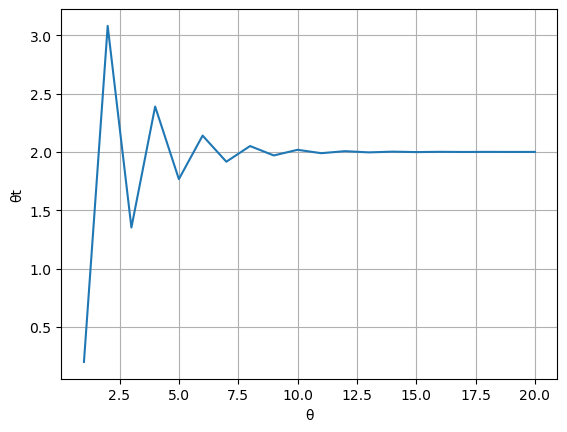

In [2]:
def gradient_descent(n_iter, init_theta, lr):
    
    t_list = []
    theta_t_list = []
    
    theta = init_theta
    
    for t in range(1,n_iter+1):
        theta = theta - lr * (2*theta - 4)
        
        t_list.append(t)
        theta_t_list.append(theta)
        
    return t_list, theta_t_list

xs, ys = gradient_descent(n_iter=20, init_theta=5, lr=0.8)

plt.plot(xs, ys)

plt.xlabel('θ')
plt.ylabel('θt')
plt.grid(True)
plt.show()

**4. Replace the analytical gradient by a two-sided numerical approximation. Use a two-sided approximation such that:** 

$$\hat{g}(\theta)=\frac{f(\theta+h)-f(\theta-h)}{2 h}$$

**Repeat part 3 using the numerical gradient.**

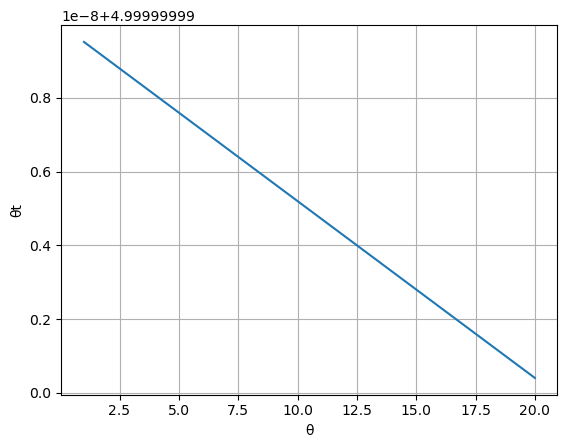

In [3]:
def function(theta):
    f = (theta - 2)**2 + 5
    return f

def gradient_descent(n_iter, init_theta, lr):
    
    t_list = []
    theta_t_list = []
    
    theta = init_theta
    h = 0.00001
    
    for t in range(1,n_iter+1):
        theta = theta - lr * ((function(theta+h) - function(theta-h)) / 2*h)
        
        t_list.append(t)
        theta_t_list.append(theta)
        
    return t_list, theta_t_list

xs, ys = gradient_descent(n_iter=20, init_theta=5, lr=0.8)

plt.plot(xs, ys)

plt.xlabel('θ')
plt.ylabel('θt')
plt.grid(True)
plt.show()

### 2. Ordinary Least Squares

In [4]:
import pandas as pd
data = pd.read_csv("Lab2_Optimization.csv", sep=";")
data.head()

,id,LoanAmount,TimeToFund
0,109570,575,0
1,111913,900,1
2,1457371,200,1
3,1470250,700,21
4,228017,450,3


**1. Plot $LoanAmount$ against $TimeToFund$ to get a sense of the relationship between these two variables.**

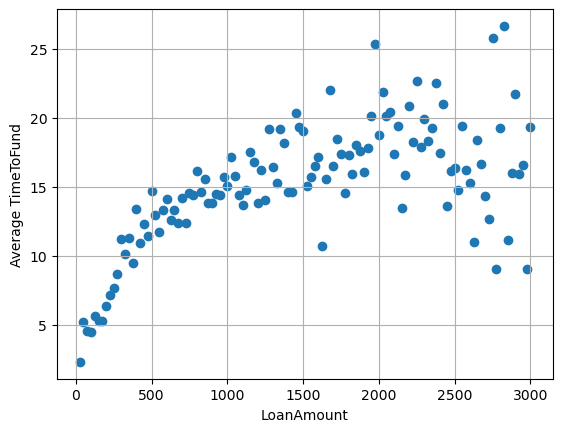

In [5]:
# Data grouped by TimeToFund
grouped_data = data.groupby(data["LoanAmount"])["TimeToFund"].mean().reset_index()

plt.scatter(grouped_data["LoanAmount"], grouped_data["TimeToFund"])
plt.xlabel('LoanAmount')
plt.ylabel('Average TimeToFund')
plt.grid(True)
plt.show()

**2. Plot the objective function (average loss) as a function of $β1 ∈ [0, .01]$, keeping $β0$ fixed at $7$.**

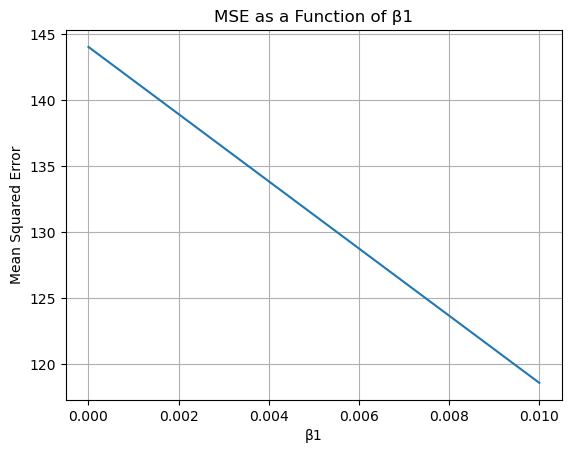

In [6]:
# Define the objective function
def MSE(beta0, beta1, y, X):
    return np.sum((y - beta0 - beta1*X)**2) / len(y)

beta0 = 7
beta1 = [0, 0.01]
losses = []
X = data["LoanAmount"]
y = data["TimeToFund"]

for i in beta1:
    loss = MSE(beta0, i, y, X)
    losses.append(loss)

plt.plot(beta1, losses)
plt.xlabel('β1')
plt.ylabel('Mean Squared Error')
plt.title('MSE as a Function of β1')
plt.grid(True)
plt.show()

**3. Use this gradient function to optimize the MSE via gradient descent, starting at $β0 = 5$ and $β1 = .005$. Use a learning rate of $λ = .0001$ and $1000$ iterations. Why does the algorithm yield NaNs for $β0$ and $β1$?**

In [7]:
def gradient_OLS(beta0, beta1, y, X):
    error = beta0 + beta1 * X - y
    g0 = 2 * np.sum(error) / len(y)
    g1 = 2 * np.sum(error * X) / len(y)
    return np.array([g0, g1])

In [8]:
def gradient_descent(beta0, beta1, y, X, lr, n_iter):
    losses = []
    for _ in range(n_iter):
        grad_beta0, grad_beta1 = gradient_OLS(beta0, beta1, y, X)
        beta0 -= lr * grad_beta0
        beta1 -= lr * grad_beta1
        loss = MSE(beta0, beta1, y, X)
        losses.append(loss)
    return beta0, beta1, losses

In [9]:
beta0, beta1, losses = gradient_descent(5, 0.005, y, X, lr=0.0001, n_iter=1000)
print(beta0, beta1)

inf nan


Interpretation: </br>
The gradient descent algorithm yields NaN and INF values for the coefficients because the gradients grow exponentially larger. At a certain iteration, the gradient values become too high to calculate the coefficient values. This issue is typically caused by using a learning rate that is too high. With each iteration, the calculated coefficient value 'jumps' from one side of the loss function to the other. As iterations progress, these jumps become larger, resulting in infinite values for the gradients.

**4. Does it help to change the learning rate?**

In [10]:
beta0, beta1, losses = gradient_descent(5, 1, y, X, lr=0.000001, n_iter=1000)
print(beta0, beta1)

5.001089747679826 0.009389088703329686


Interpretation: </br>
The issue encountered in task 3 can be addressed by decreasing the learning rate. This modification leads to smaller steps taken towards the minimum at each iteration, preventing the coefficient values from 'jumping' drastically from one side to the other on the loss function. Consequently, this prevents the gradients from increasing exponentially, as observed in task 3.

**5. What happens when we express $LoanAmount$ in $1000USD$ terms rather than in raw dollar terms? Try a learning rate of $λ ∈ {.1, .01}$.**

In [11]:
data["LoanAmount"] = data["LoanAmount"] / 1000
X = data["LoanAmount"]
y = data["TimeToFund"]

In [12]:
data.head()

,id,LoanAmount,TimeToFund
0,109570,0.575,0
1,111913,0.900,1
2,1457371,0.200,1
3,1470250,0.700,21
4,228017,0.450,3


In [13]:
# learning rate 0.1
beta0, beta1, losses = gradient_descent(5, 0.005, y, X, lr=0.0001, n_iter=1000)
print(beta0, beta1)

6.128174980902726 0.9241894560246698


In [14]:
# learning rate 0.01
beta0, beta1, losses = gradient_descent(5, 0.005, y, X, lr=0.0001, n_iter=1000)
print(beta0, beta1)

6.128174980902726 0.9241894560246698


Interpretation: </br>
When expressing the loan amount in $1000 USD terms rather than raw dollar terms, it essentially means scaling the loan amount by a factor of 1000. This scaling can affect the convergence of the gradient descent algorithm.